

<img src='https://raw.githubusercontent.com/RenoirSampaio/DS-FinalProject/master/brasao.png' height='100px' width='300px'/>

Campus de Sobral

Curso de Engenharia da Computação

Tópicos Especiais em Automação e Controle I

Projeto final de Ciência de Dados: Processo de Ciência de Dados

---


## Etapa 1 - Exploração e Limpeza

## Equipe: 
 - Breno Campos - 406808
 - Renoir Sampaio - 389113
 - Gerônimo Aguiar - 385145
 - Samuel Hericles - 389118
 - Sérgio Neto - 385138

**Hipótese ao final do notebook**



# 1 - Importações necessários


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2 - Importação da base de dados

#### Usamos o *git lfs(Large File Storage)* para armazenar dados com mais de 25mb. Sendo assim, importamos o dataset de ocorrências do ano de 2019 que ele organizado o dados de acordo com a ocorrência fichada na prf por pessoa.

In [3]:
url = 'https://media.githubusercontent.com/media/RenoirSampaio/DS-FinalProject/master/acidentes2019_todas_causas_tipos.csv'
df = pd.read_csv(url, sep = ';', encoding = 'latin-1')
df.head(15)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182210.0,402103.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005.0,Passageiro,Lesões Leves,34.0,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182210.0,402106.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005.0,Passageiro,Lesões Leves,18.0,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
2,182210.0,402104.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005.0,Passageiro,Lesões Leves,34.0,Feminino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
3,182210.0,402102.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005.0,Condutor,Lesões Leves,27.0,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
4,182211.0,402126.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Sim,Falta de Atenção à Condução,1.0,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,324868,Motoneta,HONDA/C100 BIZ ES,2004.0,Condutor,Lesões Leves,42.0,Masculino,0,1,0,0,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR
5,182212.0,402092.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16,GARUVA,Sim,Animais na Pista,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,324863,Automóvel,RENAULT/SANDERO EXP1016V,2009.0,Condutor,Lesões Leves,47.0,Feminino,0,1,0,0,"-26,1216","-48,8826",SR-SC,DEL8/3,UOP01/SC
6,182214.0,402095.0,2019-01-01,terça-feira,00:00:00,CE,20.0,"429,5",FORTALEZA,Sim,Ingestão de Substâncias Psicoativas,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Viaduto,Sim,324878,Automóvel,TOYOTA/ETIOS HB XS,2013.0,Condutor,Lesões Graves,NaN,Feminino,0,0,1,0,"-3,76999","-38,670063",SR-CE,DEL16/1,UOP02/CE
7,182215.0,403852.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Sim,Falta de Atenção à Condução,1.0,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Interseção de vias,Não,326009,Bicicleta,NaN,NaN,Condutor,Lesões Graves,34.0,Masculino,0,0,1,0,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG
8,182215.0,403851.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Sim,Falta de Atenção à Condução,1.0,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Interseção de vias,Não,324928,Automóvel,GM/ASTRA SEDAN ADVANTAGE,2009.0,Condutor,Ileso,45.0,Masculino,1,0,0,0,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG
9,182216.0,403879.0,2019-01-01,terça-feira,01:50:00,SC,470.0,"42,6",GASPAR,Sim,Ingestão de Substâncias Psicoativas,1.0,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Sim,324875,Automóvel,I/CHEVROLET AGILE LT,2011.0,Condutor,Lesões Leves,26.0,Masculino,0,1,0,0,"-26,875719","-49,003746",SR-SC,DEL8/4,UOP01/SC


# 3 - Tratamento dos dados
- 0 para valores nulos caso a coluna seja de dados numéricos;
- Vazios para strings nulas;

In [4]:
df["pesid"].fillna(0, inplace=True)
df["br"].fillna(0, inplace=True)
df["km"].fillna(0, inplace=True)
df["id_veiculo"].fillna(0, inplace=True)
df["marca"].fillna('Vazio', inplace=True)
df["ano_fabricacao_veiculo"].fillna(0, inplace=True)
df["idade"].fillna(0, inplace=True)
df["uop"].fillna('Vazio', inplace=True)
df["tipo_acidente"].fillna('Vazio', inplace=True)
df["ordem_tipo_acidente"].fillna('Vazio', inplace=True)       

In [5]:
df.isnull().sum()

id                        0
pesid                     0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_principal           0
causa_acidente            0
ordem_tipo_acidente       0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
id_veiculo                0
tipo_veiculo              0
marca                     0
ano_fabricacao_veiculo    0
tipo_envolvido            0
estado_fisico             0
idade                     0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
latitude                  0
longitude                 0
regional                  0
delegacia           

Verificamos que não há mais valores nulos.



# 3.1 - Verifiacando de outra forma com a função *info()* do pandas 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331666 entries, 0 to 331665
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      331666 non-null  float64
 1   pesid                   331666 non-null  float64
 2   data_inversa            331666 non-null  object 
 3   dia_semana              331666 non-null  object 
 4   horario                 331666 non-null  object 
 5   uf                      331666 non-null  object 
 6   br                      331666 non-null  float64
 7   km                      331666 non-null  object 
 8   municipio               331666 non-null  object 
 9   causa_principal         331666 non-null  object 
 10  causa_acidente          331666 non-null  object 
 11  ordem_tipo_acidente     331666 non-null  object 
 12  tipo_acidente           331666 non-null  object 
 13  classificacao_acidente  331666 non-null  object 
 14  fase_dia            

Vemos que coluna *Non-Null* estão na mesma quantidade, então não há mais valores nulos por esta abordagem.

# 3.2 Corrigindo os tipos de dados

Há colunas que apresentam valores inteiros, mas estavam na forma de double. Como também, havia datas que estava no formato diferente do habitual de DD-MM-AAAA.



In [7]:
df["pesid"] = df["pesid"].astype(int)
df["ano_fabricacao_veiculo"] = df["ano_fabricacao_veiculo"].astype(int)
df["idade"] = df["idade"].astype(int)
df["data_inversa"] = pd.to_datetime(df["data_inversa"])
df["horario"] = pd.to_datetime(df["horario"])

In [8]:
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182210.0,402103,2019-01-01,terça-feira,2020-09-28 01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005,Passageiro,Lesões Leves,34,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182210.0,402106,2019-01-01,terça-feira,2020-09-28 01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005,Passageiro,Lesões Leves,18,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
2,182210.0,402104,2019-01-01,terça-feira,2020-09-28 01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005,Passageiro,Lesões Leves,34,Feminino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
3,182210.0,402102,2019-01-01,terça-feira,2020-09-28 01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005,Condutor,Lesões Leves,27,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
4,182211.0,402126,2019-01-01,terça-feira,2020-09-28 01:30:00,PR,373.0,"177,3",PONTA GROSSA,Sim,Falta de Atenção à Condução,1,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,324868,Motoneta,HONDA/C100 BIZ ES,2004,Condutor,Lesões Leves,42,Masculino,0,1,0,0,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR


# 3.3 - Tirando idades maiores de 120 anos e menores que 0 anos
Acreditando que não pessoas há pessoas com menos 0 anos(alguns valores negativos) e que diregem e pessoas que com mais de 120 anos digerem.


In [9]:
df.loc[df.idade >= 120, "idade"] = 0
df.loc[df.idade <= 0, "idade"]   = 0

# 4 - Exploração dos dados(EDA)


# 4.1 - Matriz de correlação dos dados inteiros
Para valores próximos de 1 a correlação de uma coluna com outra quer dizer que os dados são propocionais, logo o contrário quando a correlação é próxima de -1 mostra que os dados são inversamente propocionais.

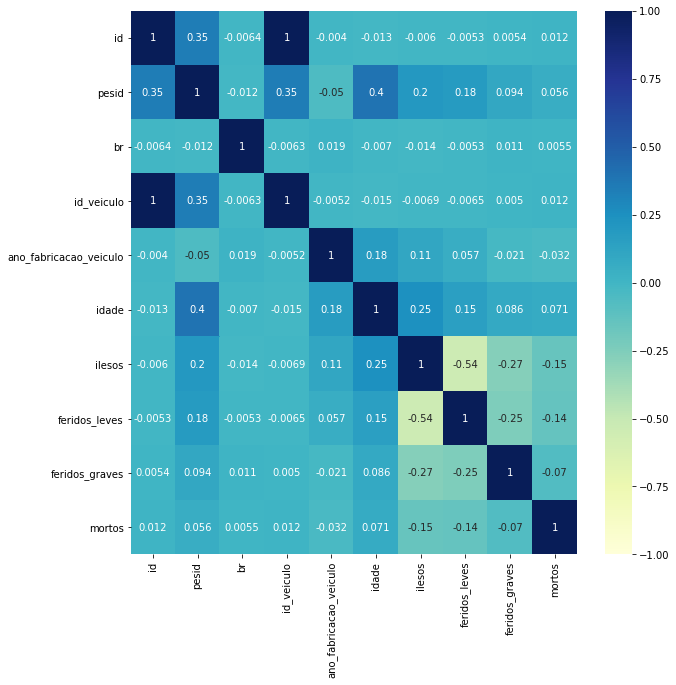

In [10]:
plt.figure(figsize = (10, 10))
matriz = df.corr() 
sns.heatmap(matriz, vmin=-1, vmax=1, center=0,annot=True,cmap="YlGnBu")
plt.show()

# 4.2 - Ranking de mortos por município

In [11]:
df.groupby("municipio")["mortos"].sum().sort_values(ascending=False).head(10)

municipio
RIACHAO DAS NEVES    167
CAUCAIA              132
CAPAO ALTO           128
BRASILIA             102
PALHOCA               95
FORTALEZA             81
CURITIBA              80
PARANAIBA             71
NOVA ANDRADINA        67
SAO JOSE              67
Name: mortos, dtype: int64

# 4.3 - Ranking de mortos por rodivia

In [12]:
df.groupby("br")["mortos"].sum().sort_values(ascending=False).head(10)

br
101.0    1498
116.0    1491
40.0      508
364.0     493
153.0     477
381.0     436
163.0     423
316.0     371
262.0     346
230.0     337
Name: mortos, dtype: int64

# 4.4 - Gráfico da quantidade de mortes por ocorrência no período de 04/2019 à 06/2019

Text(0.5, 0, ' ')

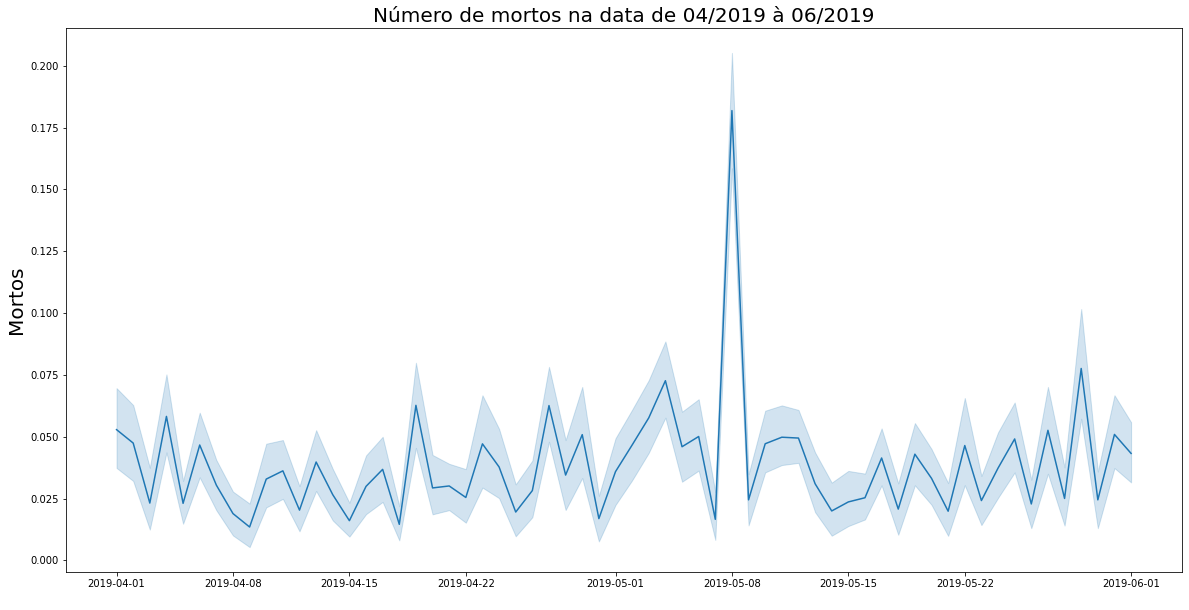

In [13]:
df_prov = df.loc[df['data_inversa'] >= '2019-04']
df_prov = df_prov.loc[df_prov['data_inversa'] <= '2019-06']
plt.figure(figsize=(20, 10))
g = sns.lineplot(x = df_prov['data_inversa'], y = df_prov['mortos'])
plt.title('Número de mortos na data de 04/2019 à 06/2019',fontsize=20)
g.set_ylabel('Mortos',fontsize=20)
g.set_xlabel(' ')

In [14]:
df.query("data_inversa == '2019-05-08' and uf== 'BA'").groupby('id')['mortos'].sum()

id
207953.0      0
207987.0      0
208027.0      0
208048.0      0
208078.0      1
208079.0      1
208093.0      0
208107.0    160
208373.0      0
211464.0      0
Name: mortos, dtype: int64

# 4.5 - Gráfico da quantidade de feridos graves por ocorrência no período de 04/2019 à 06/2019

Text(0.5, 0, ' ')

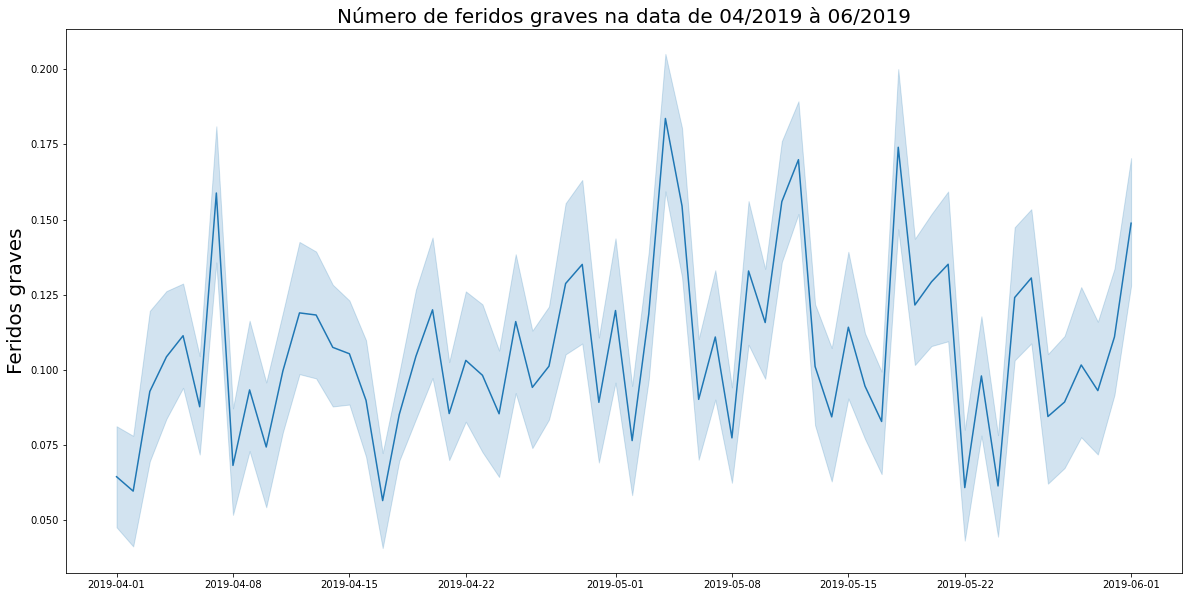

In [15]:
df_prov = df.loc[df['data_inversa'] >= '2019-04']
df_prov = df_prov.loc[df_prov['data_inversa'] <= '2019-06']
plt.figure(figsize=(20, 10))
g = sns.lineplot(x = df_prov['data_inversa'], y = df_prov['feridos_graves'])
plt.title('Número de feridos graves na data de 04/2019 à 06/2019',fontsize=20)
g.set_ylabel('Feridos graves',fontsize=20)
g.set_xlabel(' ')

# 4.6 - Agrupamento por estado

Text(0.5, 0, ' ')

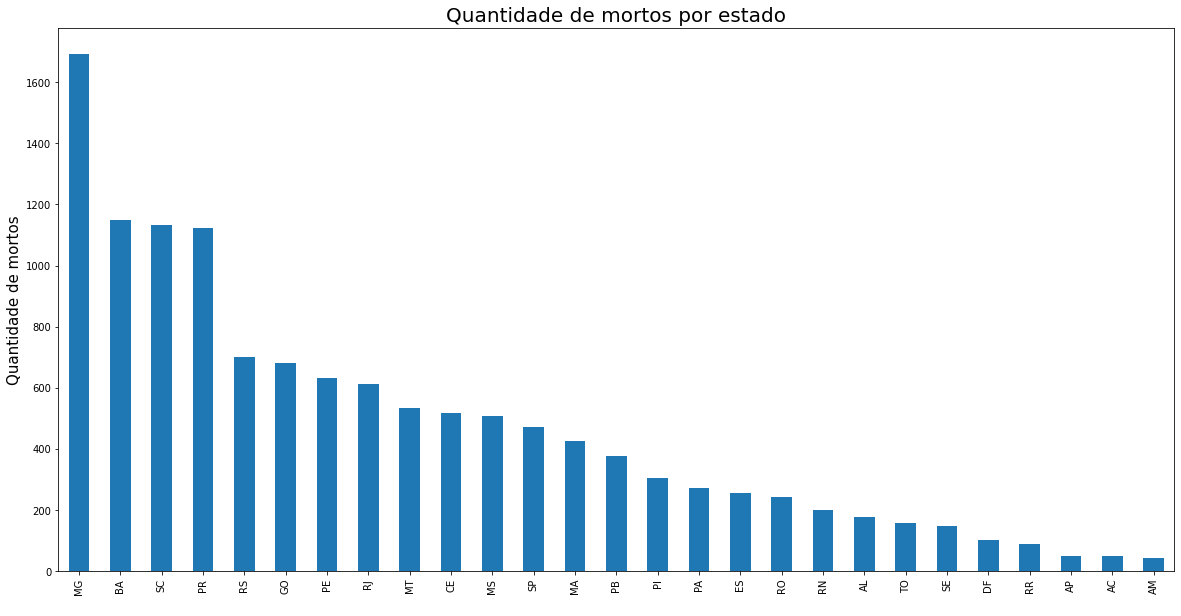

In [16]:
plt.figure(figsize=(20,10))
ax = df.groupby("uf")["mortos"].sum().sort_values(ascending=False).plot.bar()
plt.title('Quantidade de mortos por estado',fontsize=20)
ax.set_ylabel('Quantidade de mortos',fontsize=15)
ax.set_xlabel(' ')

# 4.7 - Agrupamento de tipos de acidentes por mortos

Text(0.5, 0, 'mortos')

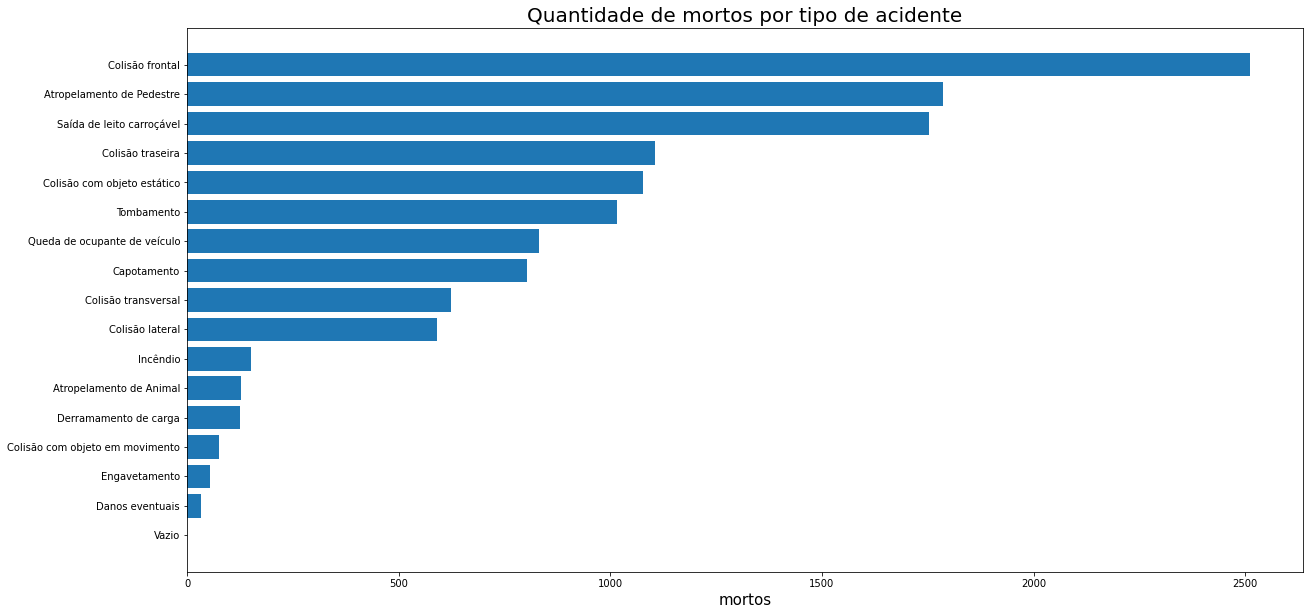

In [51]:
plt.figure(figsize=(20,10))
ax = df.groupby("tipo_acidente")["mortos"].sum().sort_values(ascending=True) #.plot.bar()
y = ax.index
x = ax.values
plt.barh(y,x)
plt.title('Quantidade de mortos por tipo de acidente',fontsize=20)
plt.xlabel('mortos',fontsize=15)

# 4.8 - Agrupamento de tipos de acidentes por traçado da via

Text(0.5, 0, 'mortos')

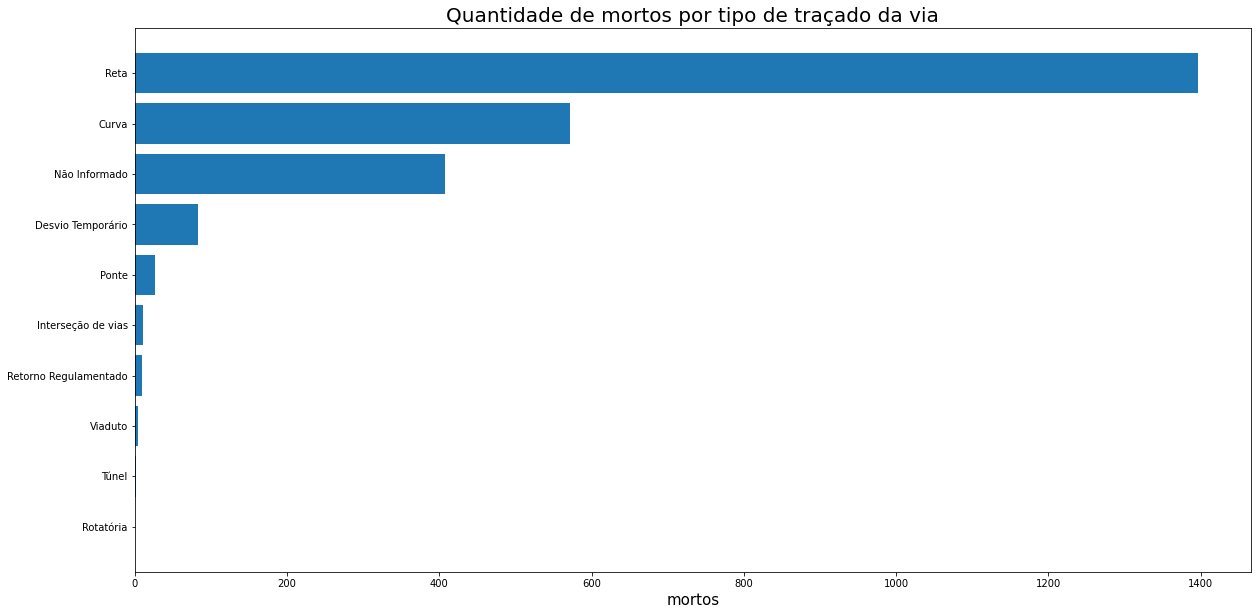

In [50]:
df_prov = df.loc[df['tipo_acidente'] == 'Colisão frontal']
plt.figure(figsize=(20,10))
ax = df_prov.groupby("tracado_via")["mortos"].sum().sort_values(ascending=True) #.plot.bar()
y = ax.index
x = ax.values
plt.barh(y,x)
plt.title('Quantidade de mortos por tipo de traçado da via',fontsize=20)
plt.xlabel('mortos',fontsize=15)

# 4.9 - Agrupamento de causas de acidente por mortos no total

Text(0.5, 0, 'mortos')

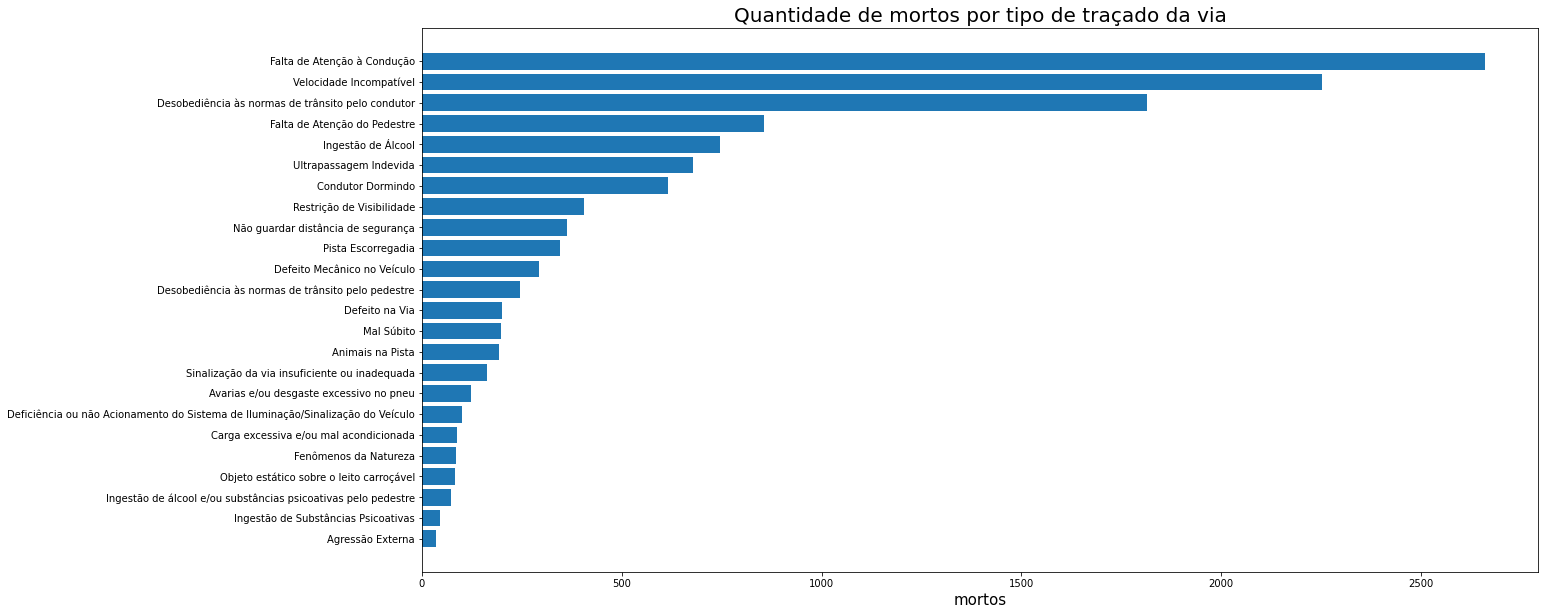

In [149]:
plt.figure(figsize=(20,10))
ax = df.groupby("causa_acidente")["mortos"].sum().sort_values(ascending=True) 
y = ax.index
x = ax.values
plt.barh(y,x)
plt.title('Quantidade de mortos por tipo de traçado da via',fontsize=20)
plt.xlabel('mortos',fontsize=15)

# 4.10 - Agrupamento de dias da semana por mortos no total

Text(0.5, 0, 'mortos')

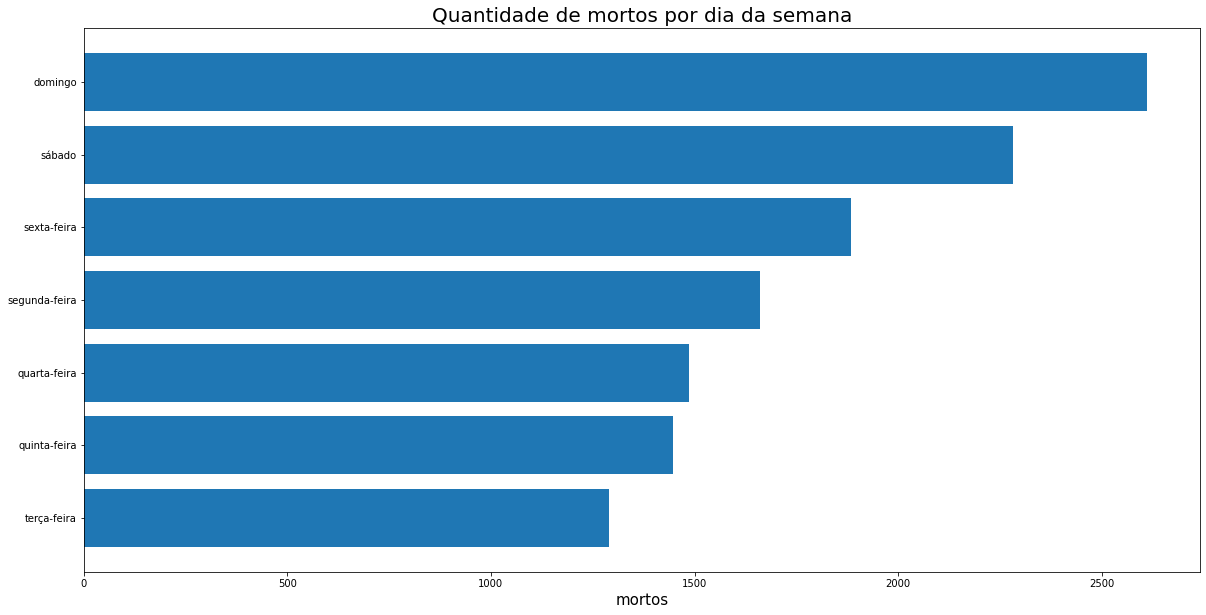

In [56]:
plt.figure(figsize=(20,10))
ax = df.groupby("dia_semana")["mortos"].sum().sort_values()
y = ax.index
x = ax.values
plt.barh(y,x)
plt.title('Quantidade de mortos por dia da semana',fontsize=20)
plt.xlabel('mortos',fontsize=15)

# 4.11 - Agrupamento de condição metereologica por total de mortos

Text(0.5, 0, 'mortos')

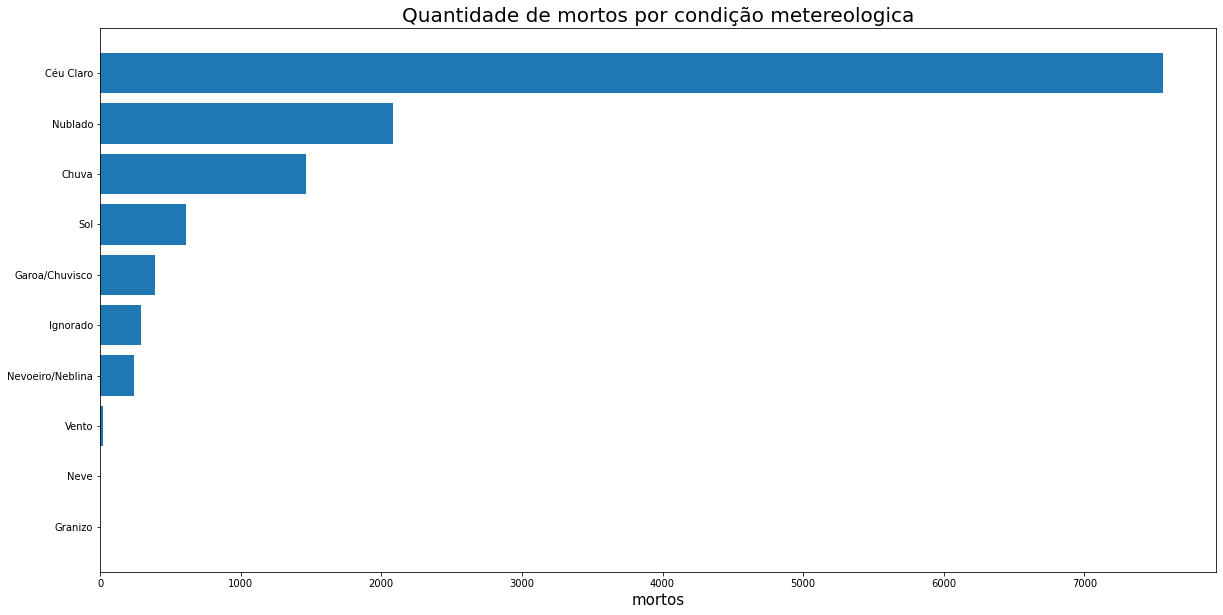

In [55]:
plt.figure(figsize=(20,10))
ax = df.groupby("condicao_metereologica")["mortos"].sum().sort_values()
y = ax.index
x = ax.values
plt.barh(y,x)
plt.title('Quantidade de mortos por condição metereologica',fontsize=20)
plt.xlabel('mortos',fontsize=15)

# 4.12 - Agrupamento da fase do dia por mortos no total

Text(0.5, 0, 'mortos')

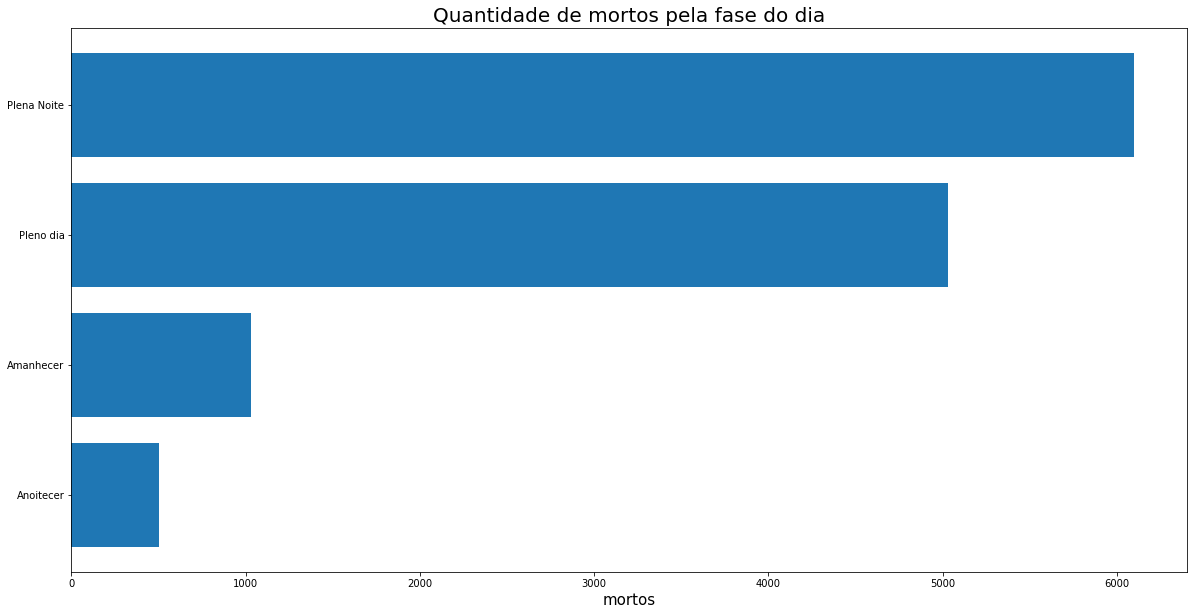

In [58]:
plt.figure(figsize=(20,10))
ax = df.groupby("fase_dia")["mortos"].sum().sort_values()
y = ax.index
x = ax.values
plt.barh(y,x)
plt.title('Quantidade de mortos pela fase do dia',fontsize=20)
plt.xlabel('mortos',fontsize=15)

# 4.13 - Agrupamento pela idade em mortos no total

Text(0.5, 0, 'idade')

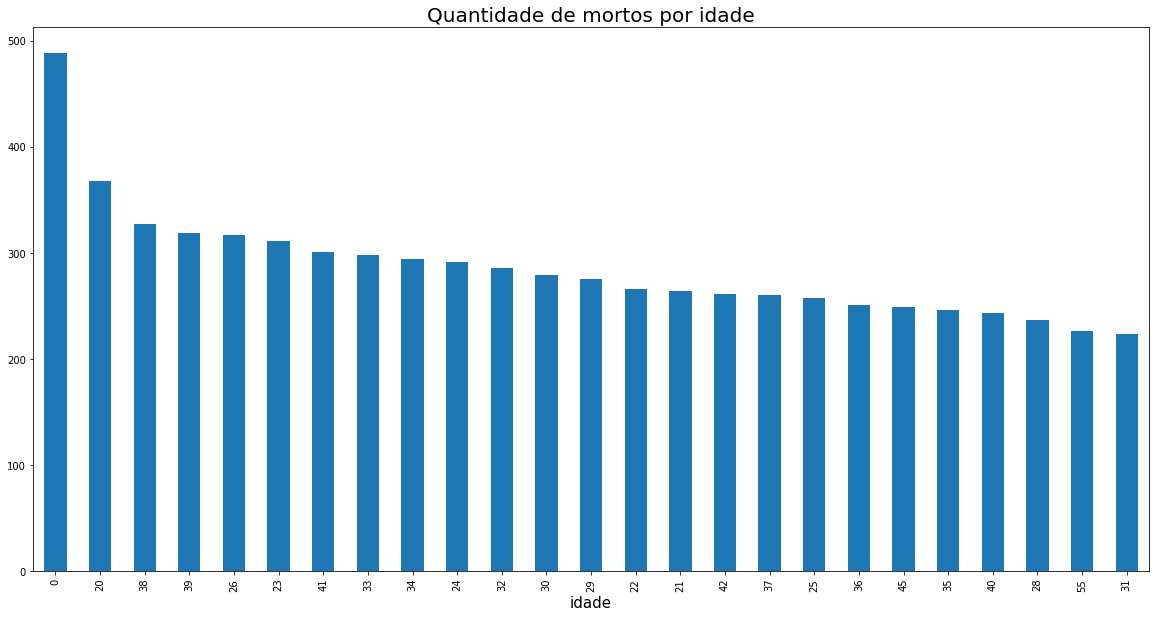

In [91]:
plt.figure(figsize=(20,10))
df.groupby("idade")["mortos"].sum().sort_values(ascending=False).head(25).plot.bar()
plt.title('Quantidade de mortos por idade',fontsize=20)
plt.xlabel('idade',fontsize=15)

# 5 - Frequência de ocorrências ordenada por percentual 



In [128]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'Qtd.': contagem, 'Percentual': percentual})
    if plot:
      plt.show()
    return res.sort_values('Percentual',ascending=False)

# 5.1 - Agrupamento de mortos por fase do dia

               Qtd.  Percentual
Pleno dia    182200      54.935
Plena Noite  114176      34.425
Anoitecer     18741       5.651
Amanhecer     16549       4.990


Text(0, 0.5, ' ')

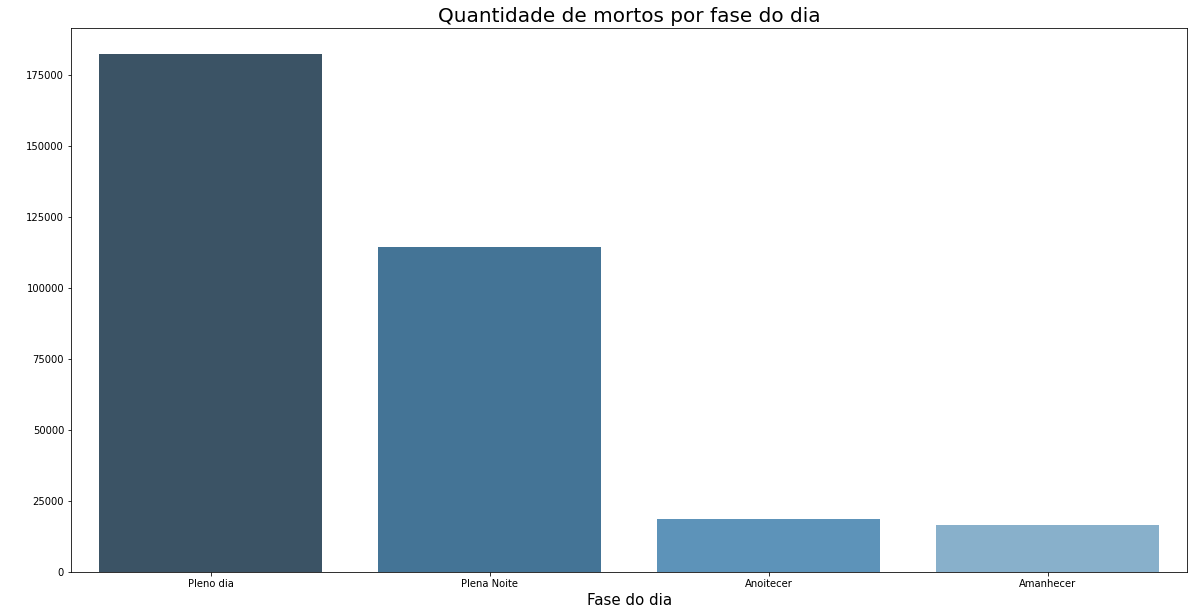

In [111]:
print(freq(df.fase_dia, plot=True))
plt.figure(figsize=(20,10))
sns.countplot(df.fase_dia.sort_values(ascending=False),palette="Blues_d")
plt.title('Quantidade de mortos por fase do dia',fontsize=20)
plt.xlabel('Fase do dia',fontsize=15)
plt.ylabel(' ',fontsize=15)

# 5.2 - Ranking do percentual de mortos por estado

In [148]:
freq(df.uf, plot=True).head(10)

,Qtd.,Percentual
MG,45970,13.860
PR,39521,11.916
SC,35823,10.801
RS,23681,7.140
SP,20574,6.203
BA,18474,5.570
RJ,18016,5.432
GO,18004,5.428
MT,12784,3.854
PE,11505,3.469


# 5.3 - Ranking do percentual de mortos por condição metereologica

In [95]:
freq(df.condicao_metereologica, plot=True).head(10)

,Qtd.,Percentual
Céu Claro,188447,56.818
Nublado,56584,17.061
Chuva,39470,11.901
Sol,26334,7.940
Garoa/Chuvisco,12222,3.685
Nevoeiro/Neblina,4036,1.217
Ignorado,3969,1.197
Vento,587,0.177
Granizo,16,0.005
Neve,1,0.000


# 5.4 - Ranking do percentual de mortos por causa de acidente


In [96]:
freq(df.causa_acidente, plot=True).head(10)

,Qtd.,Percentual
Falta de Atenção à Condução,109288,32.951
Desobediência às normas de trânsito pelo condutor,44594,13.445
Velocidade Incompatível,39619,11.945
Não guardar distância de segurança,25773,7.771
Ingestão de Álcool,23081,6.959
Defeito Mecânico no Veículo,13461,4.059
Pista Escorregadia,11434,3.447
Condutor Dormindo,11218,3.382
Ultrapassagem Indevida,9304,2.805
Falta de Atenção do Pedestre,6265,1.889


# 5.5 - Ranking do percentual de mortos por tipo de acidente


In [97]:
freq(df.tipo_acidente, plot=True).head(10)

,Qtd.,Percentual
Colisão traseira,59084,17.814
Saída de leito carroçável,43242,13.038
Colisão lateral,36249,10.929
Colisão transversal,32835,9.900
Tombamento,31960,9.636
Colisão frontal,26398,7.959
Colisão com objeto estático,25944,7.822
Queda de ocupante de veículo,22886,6.900
Capotamento,20585,6.207
Atropelamento de Pedestre,12590,3.796


# 5.6 - Ranking de mortos por tipo de pista

In [98]:
freq(df.tipo_pista, plot=True)

,Qtd.,Percentual
Simples,179008,53.972
Dupla,127712,38.506
Múltipla,24946,7.521


# 5.7 - Ranking de mortos por tipo de traçado da via

In [150]:
freq(df.tracado_via, plot=True)

,Qtd.,Percentual
Reta,197020,59.403
Curva,50260,15.154
Não Informado,47083,14.196
Interseção de vias,13634,4.111
Desvio Temporário,10355,3.122
Rotatória,5500,1.658
Retorno Regulamentado,3654,1.102
Ponte,1992,0.601
Viaduto,1819,0.548
Túnel,349,0.105


### Hipóteses ML
<!-- - Regressão por séries temporais -->
- Probabilidade de acidentes acontecerem, dado certas informações.
- Iremos prever os riscos de acidentes baseado nos parâmetros de entrada.
  - Entrada
    - BR
    - Idade
    - Município
    - Fase Dia    
    - Condicao Metereológica
    - Dia Semana
  - Saída
    - Previsão da quantidade de acidentes baseando-se nos dados inseridos.
    - Sendo um percentual (Previsão / Somatório de acidentes do dataset).
    - Com isso intervalos de percentual serão dividos para classificar a
periculosidade do trecho.